<a href="https://colab.research.google.com/github/jeppchumba/Tweets-Classification-ML/blob/main/Copy_of_MainModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import svm
#from sklearn.externals import joblib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import string
import joblib

In [ ]:
from google.colab import files
upload=files.upload() # LOADING DATA FROM OUR LOCAL MACHINE

Saving TrainData.csv to TrainData.csv


In [ ]:
df=pd.read_csv("TrainData.csv",)#read labelled tweets

In [ ]:
def readcsv():
    #df=pd.read_csv("TrainData.csv",)#read labelled tweets
    X=df['tweets'].apply(lambda x: np.str_(x))
    y=df['Label'].apply(lambda x: np.str_(x))
    X = df.tweets
    y = df.Label
    return X, y

In [ ]:
df=df.dropna()

In [ ]:
def drawrocNB(y_test,y_pred):
    fpr,tpr,threshold=roc_curve(y_test,y_pred)
    print("Drawing")
    roc_auc=auc(fpr,tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr,'b',label='NB AUC = %0.2f'%roc_auc,color='b')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [ ]:
def createNB(X,y):

    nb_clf=Pipeline([('vect',CountVectorizer(ngram_range=(1,3))),('tfidf',TfidfTransformer()),('nb',MultinomialNB())])
    nb_clf=nb_clf.fit(X,y)
    return nb_clf


In [ ]:
def evaluatemodel(y_pred,y_test):
    print( metrics.confusion_matrix(y_test,y_pred))
    accuracy=metrics.accuracy_score(y_test,y_pred)
    print(accuracy)
    report=classification_report(y_test,y_pred)
    print(report)

Naive Bayes evaluation
[[2865  104]
 [ 448 1366]]
0.8845912607150324
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2969
           1       0.93      0.75      0.83      1814

    accuracy                           0.88      4783
   macro avg       0.90      0.86      0.87      4783
weighted avg       0.89      0.88      0.88      4783

Drawing


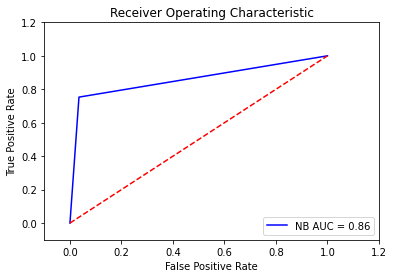

In [ ]:
def main():
    X,y=readcsv()
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)#split data into training and testing sets
    nb_clf=createNB(X_train,y_train)
    y_pred=nb_clf.predict(X_test)

    print("Naive Bayes evaluation")
    evaluatemodel(y_pred,y_test)
    drawrocNB(y_test,y_pred)
    savemodel(nb_clf)

if __name__=="__main__":
        main()

In [ ]:
def savemodel(clf):
    joblib.dump(clf,'finalmodel.pkl') #persisting the model